In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Satıcılar

🎯 Amacımız, diğerlerine göre tekrarlı olarak düşük performans gösteren satıcıları bulmak ve nedenini anlamaktır.  
Bu, Olist'in gelecekte kâr marjını artırmaya yönelik önerilerimizi şekillendirmemize yardımcı olacaktır.

## 1 - `olist/seller.py`  

`order.py` ile benzer bir süreçte, size `olist/seller.py` modülünü sunduk; içinde `Seller` sınıfı ve `Seller().get_training_data` yöntemi bulunuyor. Bu yöntem aşağıdaki özellikleri içeren bir DataFrame döndürür:

| feature_name | type | açıklama |
| --- | --- | --- |
| `seller_id` | str | satıcının benzersiz kimliği (UNIQUE) |
| `seller_city` | str | satıcının bulunduğu şehir |
| `seller_state` | str | satıcının bulunduğu eyalet |
| `delay_to_carrier` | float | sipariş, `shipping_limit_date`'den önce teslim edildiyse 0 döner; aksi takdirde gecikme süresini verir |
| `wait_time` | float | satıcı başına ortalama teslimat süresi (bekleme süresi) |
| `date_first_sale` | datetime | Olist üzerinde yapılan ilk satışın tarihi |
| `date_last_sale` | datetime | Olist üzerindeki son satışın tarihi |
| `months_on_olist` | float | Olist'te geçirilen yaklaşık ay sayısı |
| `share_of_five_stars` | float | satıcının yer aldığı siparişlerdeki beş yıldız değerlendirmelerinin oranı |
| `share_of_one_stars` | float | satıcının yer aldığı siparişlerdeki bir yıldız değerlendirmelerinin oranı |
| `review_score` | float | satıcının yer aldığı siparişler için ortalama değerlendirme puanı |
| `n_orders` | int | satıcının yer aldığı benzersiz sipariş sayısı |
| `quantity` | int | bu satıcı tarafından satılan toplam ürün adedi |
| `quantity_per_order` | float | bu satıcı için sipariş başına ortalama ürün sayısı |
| `sales` | float | bu satıcı ile ilişkili toplam satış tutarı (kargo hariç), BRL cinsinden |

❓ **Aşağıya yeni sınıfınızı import edin ve eğitim veri çerçevenizi inceleyin!** Kodları incelemek için zaman ayırın ve sizin için tam olarak nelerin hesaplandığını anlayın.

In [2]:
from olist.seller import Seller

# Seller sınıfından bir örnek oluşturup veriyi çekiyoruz
sellers = Seller().get_training_data()

# Verinin ilk 5 satırına bakıp doğru gelmiş mi kontrol ediyoruz
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00


🤔 Her satıcı için henüz hesaplanması gereken bir şey kaldı:
- Aşırı yüksek değerlendirmelerin oranı (`share_of_five_stars`) ve aşırı düşük değerlendirmelerin oranı (`share_of_one_stars`)
- (ortalama) `review_score`

😱 Düşük puanlı her sipariş Olist'in itibarına olumsuz etki yapar; bu etki `cost_of_review` ile modellenir.

Bu, daha sonra her satıcı için toplam `cost_of_review`'u hesaplamamıza yardımcı olacak!

❓ **Sizin doldurmanız gereken son metod: `get_review_score()`'u implemente edin.**

In [6]:
from olist.seller import Seller
# Yazdığımız fonksiyonun çıktısına bir göz atalım
Seller().get_review_score().head()

,seller_id,share_of_one_stars,share_of_five_stars,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,0.333333,0.666667,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,0.121827,0.527919,3.984772
2,001e6ad469a905060d959994f1b41e4f,1.000000,0.000000,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,0.134615,0.519231,3.903846
4,003554e2dce176b5555353e4f3555ac8,0.000000,1.000000,5.000000


🧪 Kodunuzu aşağıda test edin

In [5]:
from nbresult import ChallengeResult

tmp = Seller().get_training_data()
result = ChallengeResult('seller',
    shape = tmp.shape,
    median = tmp.review_score.median(),
    columns = tmp.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/data-sellers/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_seller.py::TestSeller::test_column_names PASSED                     [ 33%]
test_seller.py::TestSeller::test_median_review_score PASSED              [ 66%]
test_seller.py::TestSeller::test_shape PASSED                            [100%]

============================== 3 passed in 0.51s ===============================


💯 You can commit your code:

git add tests/seller.pickle

git commit -m 'Completed seller step'

git push origin master



💡 **Tam satır sayısını elde edemiyor musunuz?**
<details><summary>Fazladan 3 satır mı var?</summary>
Left veya right join mi yaptınız? Nedenini anlıyoruz; fakat burada sadece değerlendirme alan satıcılarla ilgileniyoruz; bu yüzden inner join kullandık.
</details>
<details><summary>2 satır mı eksik?</summary>
`Orders().get_training_data()`'ı mı kullandınız? Bu geçerli bir seçenek, fakat sadece değerlendirmelerle ilgileniyorsak biraz aşırı olabilir. O method birçok hesaplama yapar ve döndürdüğü sütunların çoğuna ihtiyaç duymuyoruz. İhtiyacımıza daha uygun başka bir `Order` methodu bulun.
</details>

⚠️ `olist` reposundaki `seller.py` dosyasına yaptığınız kod değişikliklerini commit etmeyi unutmayın!

## 2 - Satıcıları İnceleme

### (2.1) Görselleştirmeler

Bu satıcılar hakkında ilk ***`EDA - Keşifsel Veri Analizi`*** ile başlayalım.

👉 `sellers` için özet istatistiklere bakın. Satıcı başına siparişlerin medyanı nedir ❓

In [7]:
# 1. Genel özet tablosunu görelim (Ortalama, min, max, vb.)
print(sellers.describe())

# 2. Sorunun cevabını (Sipariş sayısının medyanı) direkt hesaplayalım
print("-" * 30)
print("Sipariş Medyanı:", sellers['n_orders'].median())

       delay_to_carrier    wait_time                date_first_sale  \
count       2967.000000  2967.000000                           2967   
mean           0.385636    12.139417  2017-10-23 20:09:55.342096384   
min            0.000000     1.214178            2016-09-15 12:16:38   
25%            0.000000     8.287658     2017-04-25 08:04:06.500000   
50%            0.000000    11.115143            2017-11-09 18:35:42   
75%            0.000000    14.231984            2018-04-24 18:21:19   
max           45.434039   189.863160            2018-08-28 09:44:14   
std            2.295812     7.069233                            NaN   

                      date_last_sale  months_on_olist     n_orders  \
count                           2967      2967.000000  2967.000000   
mean   2018-04-25 09:37:50.292551168         6.116616    33.650489   
min              2016-10-06 15:44:56         0.000000     1.000000   
25%              2018-02-13 09:27:30         1.000000     2.000000   
50%       

👉 Bir sonraki adımda, veri setindeki her sayısal değişkenin dağılımını tek bir büyük görselde çizeceğiz. 

Kod size verildi, hücreyi çalıştırmanız yeterli.

- 👀 Herhangi bir aykırı değer fark ediyor musunuz?
- Sipariş sayısının dağılımı nasıl görünüyor ❓

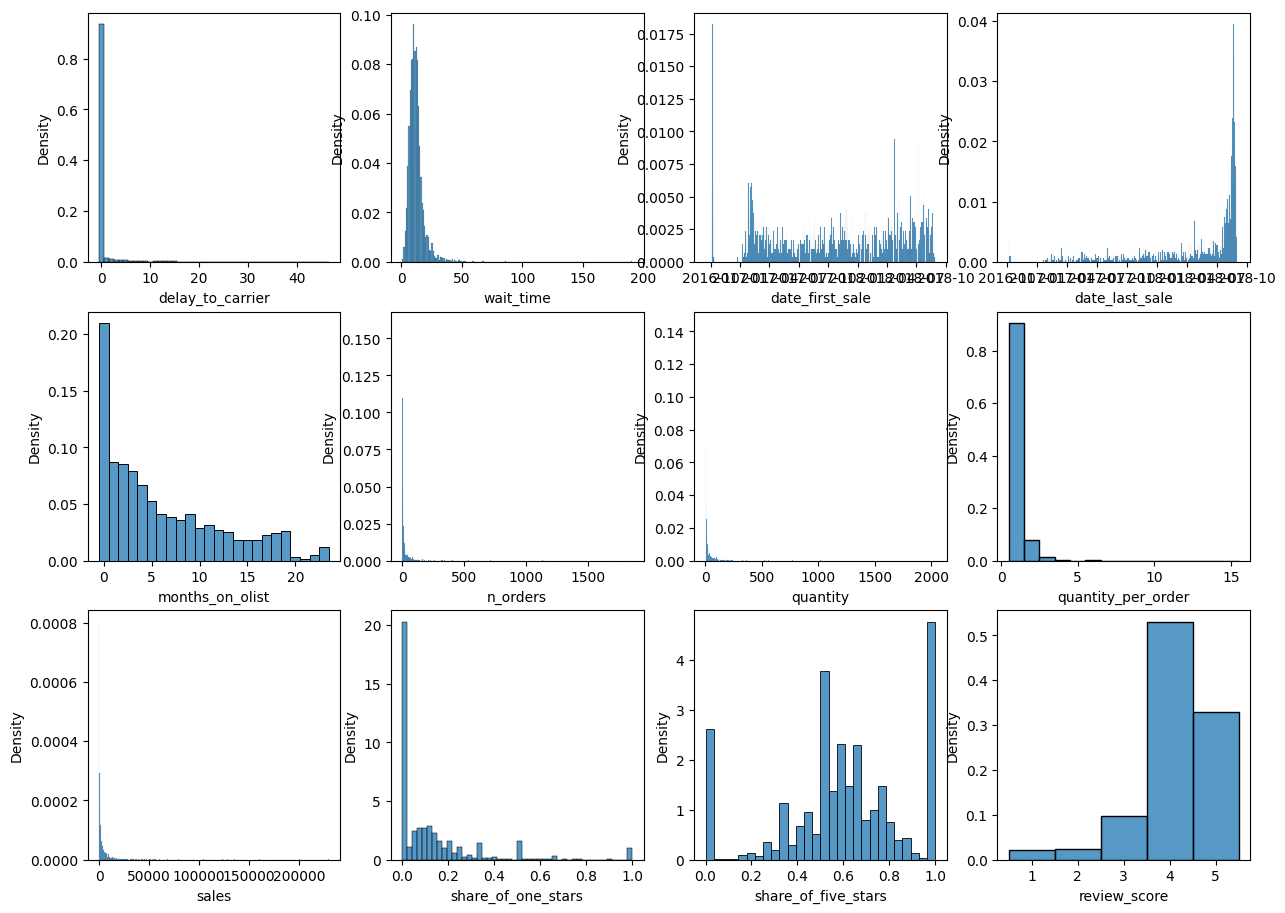

In [8]:
plt.figure(figsize=(15,11))
for (i, col) in enumerate(sellers.describe().columns):#["wait_time", "delay_to_carrier", "avg_review_score", "n_orders", "quantity", "price"]):
    plt.subplot(3,4,i+1)
    sns.histplot(sellers[col], kde=False, stat='density', discrete=[True,None][col in ['share_of_one_stars','share_of_five_stars','sales']]);

💡 Çok düşük değerlendirme puanlarına sahip bir grup satıcının öne çıktığı görünüyor!

📊 Grafiksel olarak inceleyelim:
- `plotly` kullanarak `delay_to_carrier` ile `wait_time` arasındaki ilişkiyi gösteren bir saçılma grafiği (scatterplot) oluşturuyoruz; kabarcık boyutunu satıcının toplam `sales`'i, rengini ise `review_score` belirliyor.

`plotly`'ı daha sonra detaylı göreceğiz; şimdilik aşağıdaki hücreyi çalıştırın.

In [9]:
import plotly.express as px
fig = px.scatter(data_frame = sellers[sellers['review_score'] < 4],
    x="wait_time",
    y="delay_to_carrier",
    size="sales",
    color="review_score",
    size_max = 60,
    opacity = 0.5
)
fig.show()

En kötü satıcıları bulmak için `x`, `y`, `color` ve `size` değerlerini değiştirmekten çekinmeyin.

### (2.2) `review_score`'u OLS ile modelleme

⚠️ Saçılma grafikleri veriyi görsel olarak analiz etmemizi sağlar, fakat sınırlamaları vardır: deneme-yanılma içerir ve ilişkileri yalnızca niteliksel değerlendiririz.

💡 **Satıcıların `review_score`** değişkenini açıklamak için daha sağlam bir yöntem, `statsmodels` içinde **çok değişkenli (multivariate) OLS** kullanarak çeşitli özelliklerin `review_score` üzerindeki etkisini modellemektir.

İstediğiniz sayısal özellikleri kullanarak bir OLS oluşturalım.

👉 Regresyon katsayılarını karşılaştırabilmek için önce aşağıdaki `standardize` fonksiyonunu kullanarak özelliklerinizi standardize edin.

In [10]:
def standardize(df, features):
    """Standardize specified numerical features in a DataFrame using z-score.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe.
    features : list of str
        List of column names to standardize.

    Returns
    -------
    pandas.DataFrame
        A copy of the original dataframe where the specified features have been
        standardized to zero mean and unit variance. Other columns are left
        unchanged.
    """
    df_standardized = df.copy()
    mu = df[features].mean()
    sigma = df[features].std()
    df_standardized[features] = (df[features] - mu) / sigma
    return df_standardized

In [11]:
# Hangi özellikleri inceleyeceğimizi listeliyoruz
features = ['wait_time', 'delay_to_carrier', 'n_orders', 'quantity', 'quantity_per_order', 'sales', 'months_on_olist']

# Yukarıda tanımladığımız 'standardize' fonksiyonunu kullanarak verileri eşitliyoruz
sellers_standardized = standardize(sellers, features)

👉 Sonraki adımda bir OLS modeli oluşturun ve fit edin.

In [12]:
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

❓ En etkili özellikler hangileri?

👉 Sıralanmış katsayılarla bir 📊 `bar_plot` çizin.

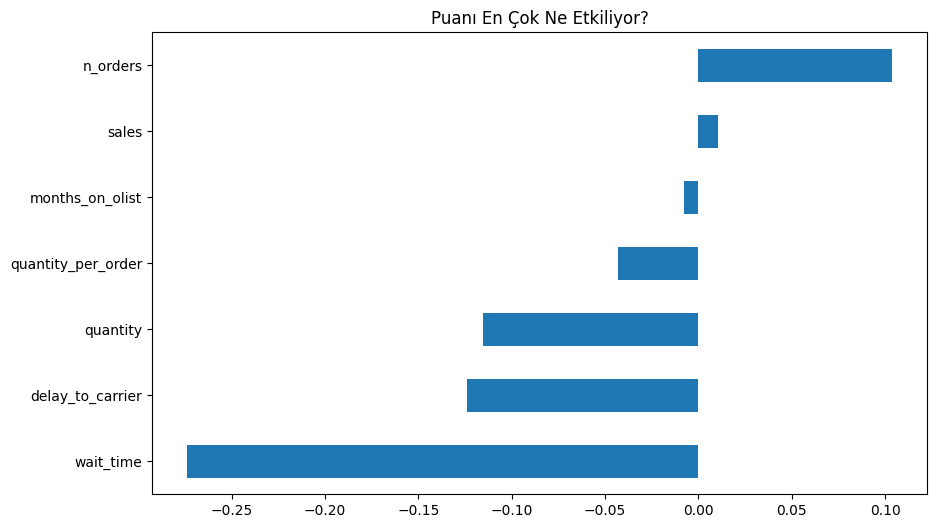

In [13]:
# 1. İncelemek istediğimiz özelliklerin listesini yapalım
features = ['wait_time', 'delay_to_carrier', 'n_orders', 'quantity', 
            'quantity_per_order', 'sales', 'months_on_olist']

# 2. Verileri standardize edelim (Hepsini aynı ölçeğe getiriyoruz)
sellers_standardized = standardize(sellers, features)

# 3. Modeli kuralım (Formül: Puan ~ Özellik1 + Özellik2 + ...)
model = smf.ols(formula=f"review_score ~ {' + '.join(features)}", data=sellers_standardized).fit()

# 4. Hangi özellik puanı ne kadar etkiliyor? Çubuk grafik çizelim.
# (Intercept'i hariç tutuyoruz çünkü o başlangıç noktası, etki değil)
model.params[1:].sort_values().plot(kind='barh', figsize=(10, 6), title="Puanı En Çok Ne Etkiliyor?");

👉 Son olarak modelinizin performansını (`R-squared`) ve `residuals`'ı inceleyin

R-squared: 0.194


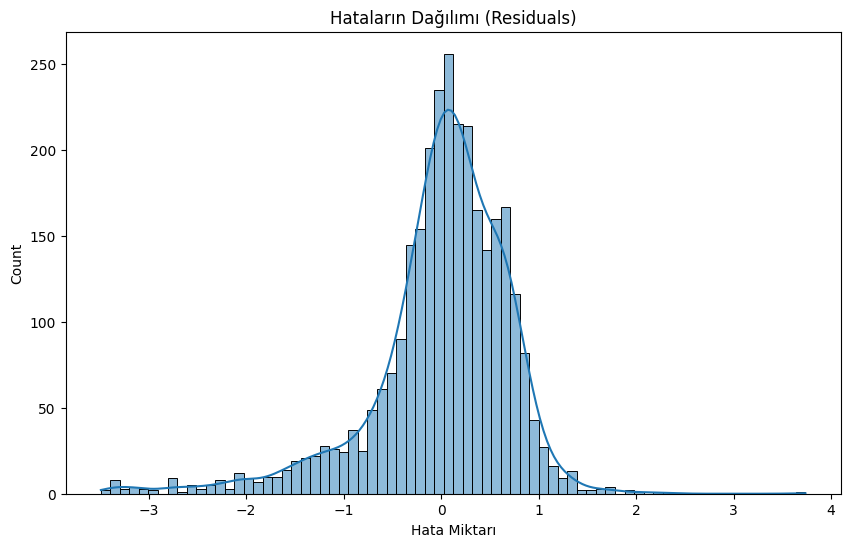

In [14]:
# 1. R-kare değerini yazdıralım (Modelin başarı puanı)
print(f"R-squared: {model.rsquared:.3f}")

# 2. Hataların (Residuals) grafiğini çizelim
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True)
plt.title("Hataların Dağılımı (Residuals)")
plt.xlabel("Hata Miktarı")
plt.show()

👉 Gerçek değerlendirme puanlarını ve modelin tahmin ettiği puanları aynı grafikte göstererek karşılaştırın.

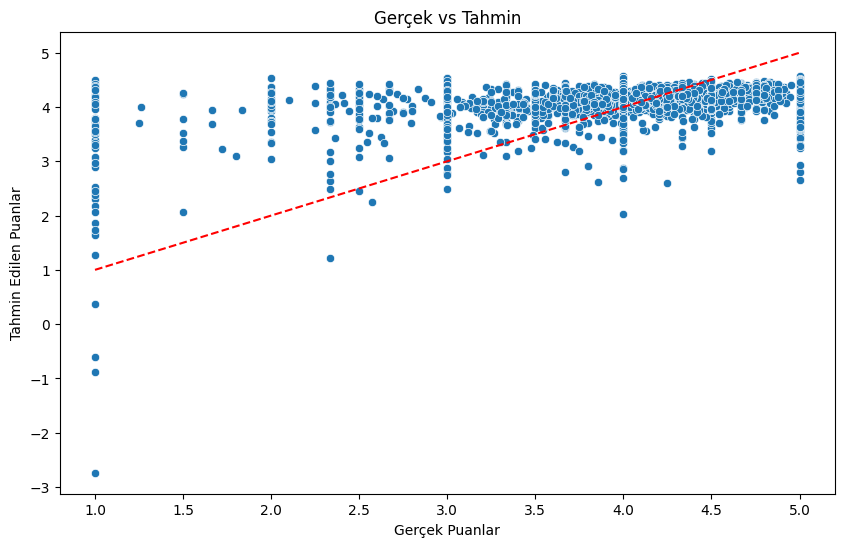

In [15]:
# Modelin tahmin ettiği puanları alalım
predicted_reviews = model.predict(sellers_standardized[features])

# Grafik çizelim
plt.figure(figsize=(10,6))
sns.scatterplot(x=sellers['review_score'], y=predicted_reviews)
plt.plot([1, 5], [1, 5], color='red', linestyle='--') # Kırmızı referans çizgisi
plt.xlabel("Gerçek Puanlar")
plt.ylabel("Tahmin Edilen Puanlar")
plt.title("Gerçek vs Tahmin")
plt.show()

👉 Artıkları (residuals) görselleştirin

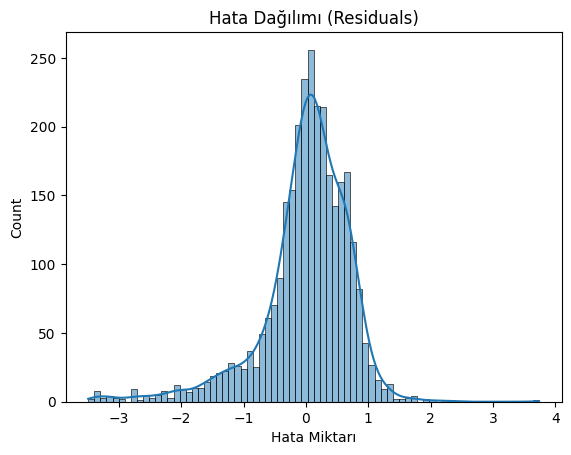

In [16]:
# Hataların histogramını çizelim
sns.histplot(model.resid, kde=True)
plt.title("Hata Dağılımı (Residuals)")
plt.xlabel("Hata Miktarı")
plt.show()

### (2.3) Analize `seller_state` bilgisini ekleyin

❓ Henüz `seller_state` bilgisini kullanmadık.  
- Sadece `seller_state`'lere karşı `review_score`'u regresyonla modelleyen yeni bir OLS oluşturun.
- `olist/utils.py` içinde sizin için yazılmış olan `return_significative_coef(model)` fonksiyonunu kullanarak anlamlı (significant) özellikleri analiz edin.
- `review_score` açısından en iyi eyaletler hangileri?

<details>
    <summary>- İpuçları -</summary>
        
⚠️ Dikkat, `seller_state` kategorik bir özelliktir. 
    
💡 Formülde kategorik değişkenleri belirtmek için `C(a_cat_feature)` kullanın. Bu, her benzersiz kategori için bir boolean değişken (`is_cat_feature_xx`) oluşturacaktır.

</details>

In [17]:
from olist.utils import return_significative_coef

# 1. Sadece Eyalet (seller_state) bilgisini kullanarak model kuralım
# C("seller_state") yazmamızın sebebi, bunun bir kategori (isim) olduğunu belirtmek.
model_state = smf.ols(formula='review_score ~ C(seller_state)', data=sellers).fit()

# 2. İstatistiksel olarak "anlamlı" olan eyaletleri listeleyelim
return_significative_coef(model_state)

,variable,p_value,coef
0,Intercept,0.003630,2.333333
16,C(seller_state)[T.RN],0.014751,2.142381
4,C(seller_state)[T.ES],0.011300,2.077548
8,C(seller_state)[T.MS],0.026098,1.954474
11,C(seller_state)[T.PB],0.025835,1.930556
9,C(seller_state)[T.MT],0.035051,1.889815
19,C(seller_state)[T.SC],0.022605,1.833534
14,C(seller_state)[T.PR],0.022771,1.829067
18,C(seller_state)[T.RS],0.024153,1.815430
5,C(seller_state)[T.GO],0.025828,1.810196


☝️ Bazı eyaletlerin ortalama olarak diğerlerinden _anlamlı_ biçimde daha iyi değerlendirmelere sahip olduğu görülebilir.

🤔 Bu, daha düşük `quantity_per_order`, daha kısa `wait_time` veya `delay_to_carrier`'dan mı kaynaklanıyor? Yoksa elimizde olmayan başka faktörlerden mi?

❓ **`seller_state` etkisini diğerlerinden izole etmeye çalışın: OLS modelinize sürekli (continuous) diğer özellikleri ekleyin; `seller_state` artık istatistiksel olarak anlamlı olmayana kadar devam edin!**

In [18]:
# Önce sayısal özellikleri (daha önce 'features' diye bir liste yapmıştık) metin olarak birleştiriyoruz
numerical_features = ' + '.join(features)

# Şimdi formülü yazıyoruz: Puan ~ Eyalet + Kargo Süresi + Satışlar + ...
formula = f"review_score ~ C(seller_state) + {numerical_features}"

# Modeli kuruyoruz (Standardize edilmiş veriyi kullanmayı unutmuyoruz)
model_full = smf.ols(formula=formula, data=sellers_standardized).fit()

In [19]:
# Anlamlı katsayıları yazdıralım
return_significative_coef(model_full)

,variable,p_value,coef
0,Intercept,3.527384e-07,3.697057
26,quantity_per_order,1.256953e-03,-0.043394
23,delay_to_carrier,1.190897e-15,-0.121842
22,wait_time,2.246635e-70,-0.278252


☝️ Analize `wait_time` ekledikten sonra, 22 adet `is_seller_state_xx` dummy değişkeninin hiçbirinin istatistiksel olarak anlamlı olmadığı görüldü:

Küçük veri setimiz göz önüne alındığında (çoğu eyalette çok az sayıda satıcı var):
- "Bazı eyaletlerin, `wait_time` dışındaki nedenlerle doğal olarak diğerlerinden daha iyi olduğu" sonucuna _varamayız_.
- Başka bir deyişle, "`seller_state`'in `wait_time` dışında `review_score` üzerinde etkisi yoktur" hipotezini reddedemeyiz.

🏁 Tebrikler!

💾 Commit ve push yapın:
- `sellers.ipynb` not defterinizi
- ayrıca `seller.py` dosyanızı